In [22]:
import mne
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [13]:
raw = mne.io.read_raw_fif('sub-02_mne_raw.fif', preload=True, verbose=False)
print('Channels:', raw.ch_names)
print('Frequency:', raw.info['sfreq'])
raw

Channels: ['F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'EOG1', 'EOG2', 'EMG1']
Frequency: 100.0


<Raw | sub-02_mne_raw.fif, 9 x 294000 (2940.0 s), ~20.2 MB, data loaded>

In [14]:
sls = yasa.SleepStaging(raw, eeg_name="C4", eog_name="EOG1", emg_name="EMG1", metadata=dict(age=21, male=False))
y_pred = sls.predict()
print(y_pred)

['W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'N2' 'N2' 'W' 'N2'
 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'N1' 'N2' 'W' 'N1' 'N1'
 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2'
 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2' 'N2'
 'N2' 'N2' 'N2' 'N2' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3'
 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3' 'N3'
 'N3' 'N3' 'N3' 'W' 'N3' 'W' 'W' 'W']


/usr/local/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [15]:
sls.predict_proba()

N1        N2        N3         R         W
epoch                                                  
0      0.019392  0.033505  0.001639  0.005495  0.939969
1      0.075906  0.040468  0.001974  0.012812  0.868840
2      0.012592  0.005998  0.000151  0.002452  0.978806
3      0.011069  0.006643  0.000039  0.001884  0.980364
4      0.011321  0.028442  0.000220  0.002674  0.957343
...         ...       ...       ...       ...       ...
93     0.028755  0.078150  0.263581  0.010250  0.619264
94     0.018776  0.093083  0.575573  0.010271  0.302296
95     0.029719  0.036139  0.007347  0.005370  0.921425
96     0.001642  0.005175  0.002520  0.000904  0.989759
97     0.001098  0.002812  0.000454  0.000220  0.995417

[98 rows x 5 columns]

<AxesSubplot:xlabel='Time (30-sec epoch)', ylabel='Probability'>

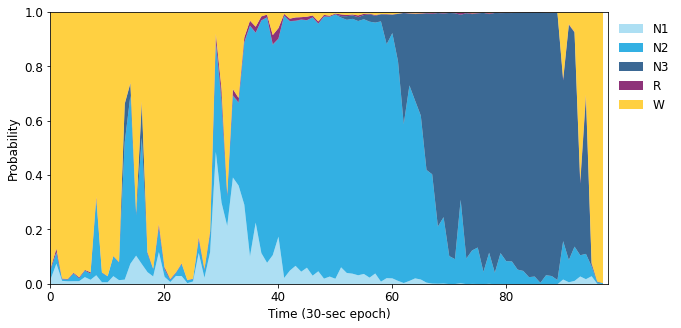

In [16]:
sls.plot_predict_proba()

In [17]:
confidence = sls.predict_proba().max(1)
confidence

epoch
0     0.939969
1     0.868840
2     0.978806
3     0.980364
4     0.957343
        ...   
93    0.619264
94    0.575573
95    0.921425
96    0.989759
97    0.995417
Length: 98, dtype: float64

In [32]:
stage = y_pred
stage[stage=='W']=0 
stage[stage=='N1']=1 
stage[stage=='N2']=2
stage[stage=='N3']=3
stage[stage=='R']=4
print(stage)

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 0]


In [19]:
data = pd.DataFrame({'Stage': stage, 'Confidence': confidence})
data.to_csv("hypno_test.csv")

([<matplotlib.axis.YTick at 0x12acb0430>,
 [Text(0, 0, 'Wake'),
  Text(0, 1, 'N1'),
  Text(0, 2, 'N2'),
  Text(0, 3, 'N3'),
  Text(0, 4, 'REM')])

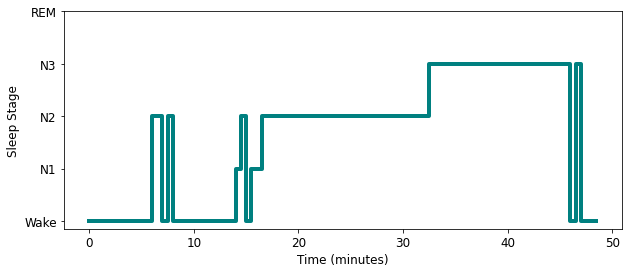

In [33]:
csv = np.loadtxt("hypno_test.csv", delimiter=',', skiprows=1)

x = (csv[:,0])/2
y = csv[:,1]

figure(figsize=(10,4))
plt.plot(x, y, drawstyle='steps', label='steps (=steps-pre)',color='teal', linewidth='4')
plt.xlabel('Time (minutes)')
plt.ylabel('Sleep Stage')
y = ['Wake','N1','N2','N3','REM']
plt.yticks(np.arange(len(y)), y, rotation=0)